## pair0048: 
Time series modelling of water resources and environmental systems

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from diptest import diptest   

In [17]:
# Load dataset using a raw string for the separator
df = pd.read_csv('datasets/pair0048.txt', sep=r'\s+', header=None, names=['Indoor temperature', 'Outdoor temperature'])

In [18]:
# Display few rows of the dataset
print(df.head())

   Indoor temperature  Outdoor temperature
0             25.2778              15.5667
1             25.0889              14.8611
2             24.9444              14.2222
3             24.7500              14.2167
4             24.5555              14.4944


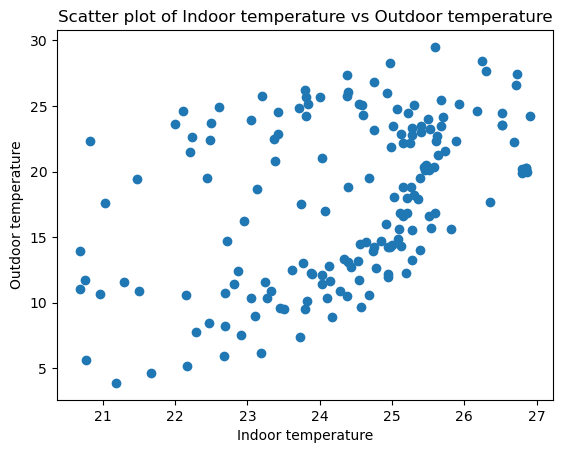

In [19]:
# Scatter Plot
plt.scatter(df['Indoor temperature'], df['Outdoor temperature'])
plt.xlabel('Indoor temperature')
plt.ylabel('Outdoor temperature')
plt.title('Scatter plot of Indoor temperature vs Outdoor temperature')
plt.show()

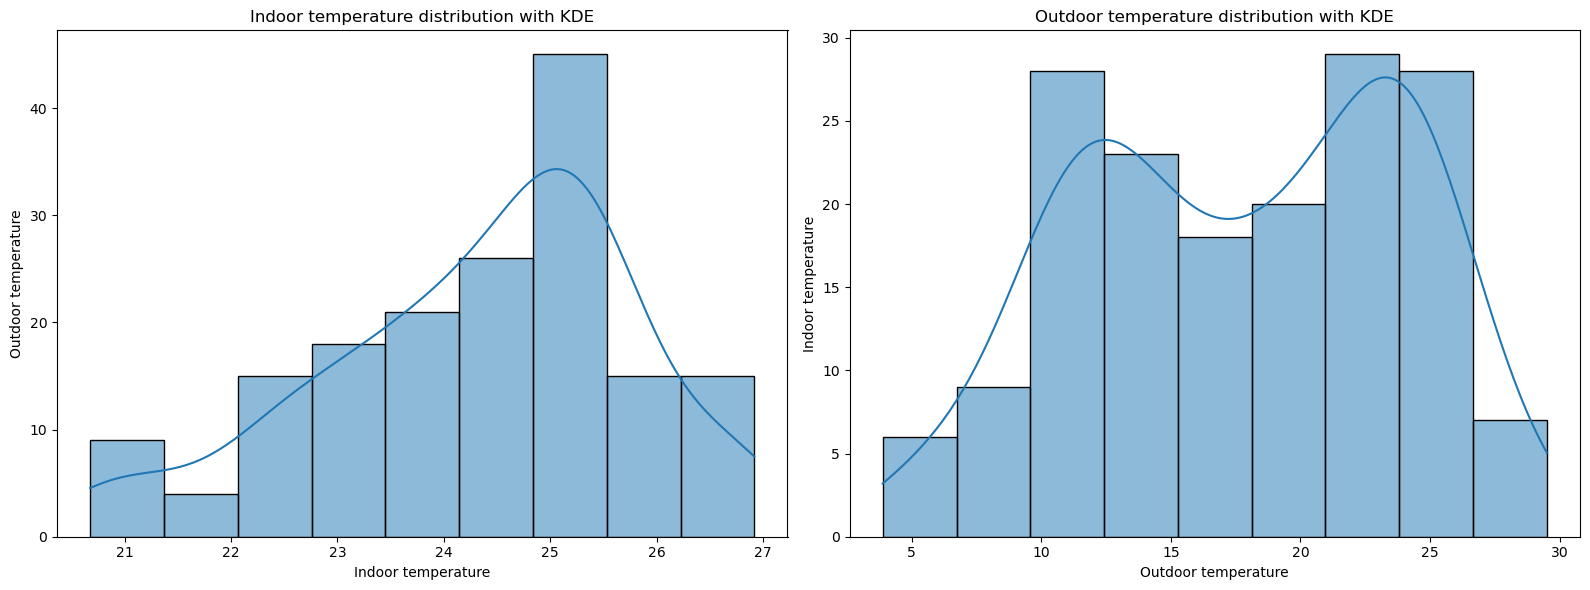

In [20]:
# Plot the distribution of the data in both directions (x and y)
fig, axis = plt.subplots(1, 2, figsize=(16,6))

# Plot for Indoor temperature -> Outdoor temperature (X -> Y)
sns.histplot(df['Indoor temperature'], kde=True, ax=axis[0])
axis[0].set_xlabel('Indoor temperature')
axis[0].set_ylabel('Outdoor temperature')
axis[0].set_title('Indoor temperature distribution with KDE')

# Plot for Outdoor temperature -> Indoor temperature (Y -> X)
sns.histplot(df['Outdoor temperature'], kde=True, ax=axis[1])
axis[1].set_xlabel('Outdoor temperature')
axis[1].set_ylabel('Indoor temperature')
axis[1].set_title('Outdoor temperature distribution with KDE')

# Adjust layout to set the title and labels
plt.tight_layout()
plt.show()

In [21]:
# Dip-Test for x and y
dip_test, p_val = diptest(np.array(df['Indoor temperature']))
print(f"Dip-Test (X →  Y): {dip_test}, p-value: {p_val}")   
dip_test, p_val = diptest(np.array(df['Outdoor temperature']))
print(f"Dip-Test (Y →  X): {dip_test}, p-value: {p_val}")
    

Dip-Test (X →  Y): 0.0174589484811473, p-value: 0.9907580728146268
Dip-Test (Y →  X): 0.03932097801850293, p-value: 0.060287395717589676


### Findings:
- The ground truth relationship is Y → X
- The dip test results suggest that the distribution of X → Y is likely **unimodal**, supported by a high p-value 0.99
- Similarly the distribution of Y → X direction could be considered **unimodal**, supported by a light higher p-value 0.060 than a significant level of of 0.05.